In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('./data/process_data.csv')
df.head()

,Bad,badCd,ptGroupNm,qabDscr,Year,Female,Edu,Skill,Hand,NumberofYear,Married,Chiled,Pregnancy,CommutingTime,Payment,Height,Weight,DutyHours,OverTimeWork
0,1,C0112,MAIN,피복밀림,33.0,1.0,1.0,2.0,1.0,5.0,1.0,1.0,0.0,0.0,5315000.0,155.0,45.0,0.0,0.0
1,0,C0112,MAIN,피복밀림,36.0,1.0,1.0,2.0,1.0,5.0,1.0,1.0,0.0,0.0,4164000.0,153.0,56.0,216.0,0.0
2,0,C0112,MAIN,피복밀림,35.0,1.0,1.0,2.0,1.0,5.0,1.0,1.0,0.0,0.0,4821000.0,151.0,46.0,226.5,0.0
3,0,C0112,MAIN,피복밀림,33.0,1.0,1.0,2.0,1.0,5.0,1.0,1.0,0.0,0.0,5315000.0,155.0,45.0,0.0,0.0
4,0,C0112,MAIN,피복밀림,36.0,1.0,1.0,2.0,1.0,5.0,1.0,1.0,0.0,0.0,4821000.0,150.0,45.0,224.0,0.0


In [3]:
del df['badCd']
del df['ptGroupNm']
del df['qabDscr']

data = np.array(df)
nvar = data.shape[1]
datax = data[:,1:nvar]
datay = data[:,0]

## 상관계수 분석 결과

C:\Users\KimJinSeop\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


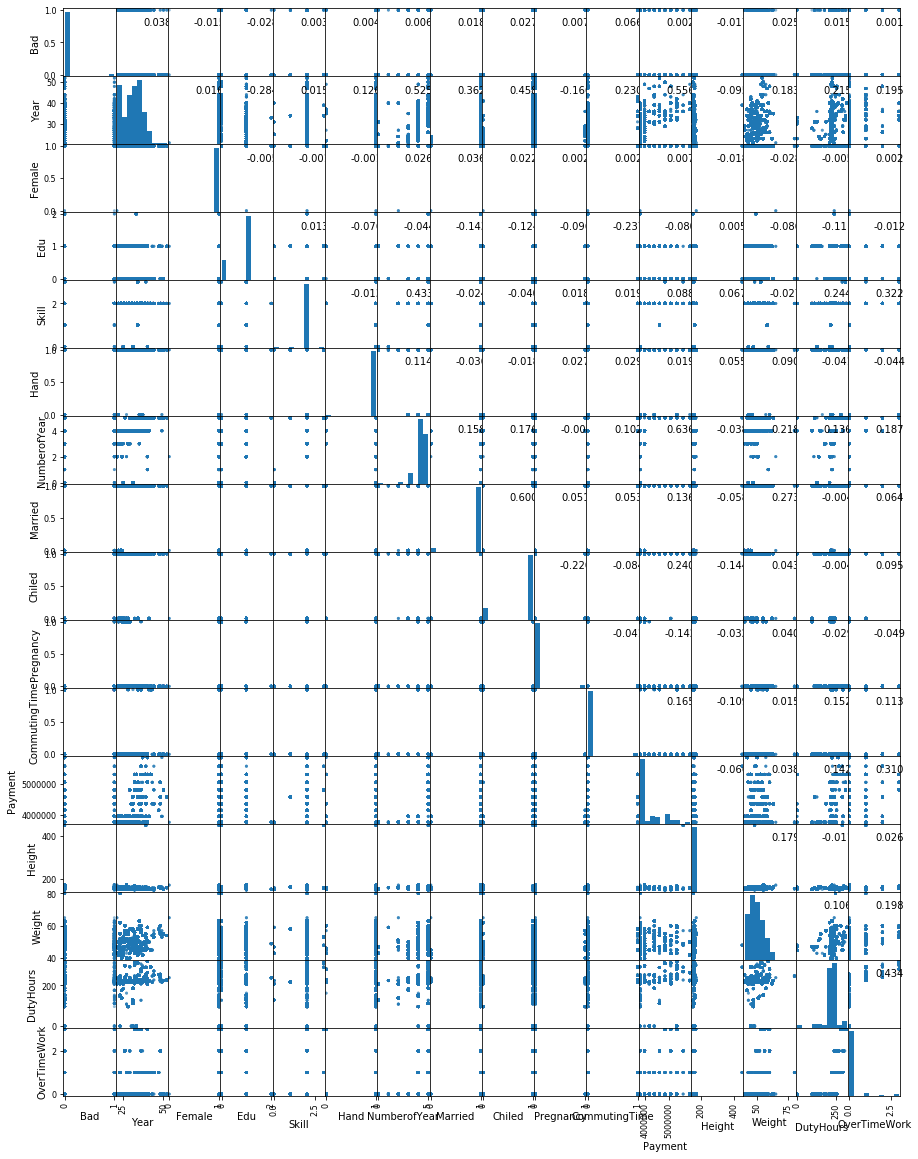

In [4]:
axes = pd.plotting.scatter_matrix(df, figsize = (15,20), alpha = 0.5)
corr = df.corr().as_matrix()
for i,j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i,j].annotate("%.3f" %corr[i,j],(0.8, 0.8), xycoords = 'axes fraction', ha = 'center', va ='center')
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(datax, datay, test_size=0.3, random_state=500)

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_x)
train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

## 분석결과 모두 사용하지 않는 경우

In [7]:
from sklearn.naive_bayes import GaussianNB
bayes = GaussianNB(priors=[0.59, 0.41])
bayes.fit(train_x,train_y)
predict = bayes.predict(test_x)

In [8]:
dif = test_y - predict
accuracy1 = 1 - (np.size(np.where(dif != 0))/np.size(test_y))
print(accuracy1)

0.8753891050583658


## 로지스틱 회귀분석을 통한 p-Value만 고려하여 사용한 경우

In [9]:
df.columns

Index(['Bad', 'Year', 'Female', 'Edu', 'Skill', 'Hand', 'NumberofYear',
       'Married', 'Chiled', 'Pregnancy', 'CommutingTime', 'Payment', 'Height',
       'Weight', 'DutyHours', 'OverTimeWork'],
      dtype='object')

In [10]:
import statsmodels.api as sm
x = df[['Year', 'Female', 'Edu', 'Skill', 'Hand', 'NumberofYear',
       'Married', 'Chiled', 'Pregnancy', 'CommutingTime', 'Payment', 'Height',
       'Weight', 'DutyHours', 'OverTimeWork']]
x2 = sm.add_constant(x)
model = sm.OLS(datay,x2)
result = model.fit()
result.summary()

C:\Users\KimJinSeop\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     18.46
Date:                Thu, 07 Nov 2019   Prob (F-statistic):           5.69e-50
Time:                        00:32:37   Log-Likelihood:                 9902.1
No. Observations:               34266   AIC:                        -1.977e+04
Df Residuals:                   34250   BIC:                        -1.964e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2688      0.110      2.455      0.014       0.054       0.483
Year              0.0010      0.000      3.904      0.000       0.001       0.002
Female           -0.2784      0.105     -2.653      0.008      -0.484      -0.073
Edu               0.0013      0.002      0.510      0.610      -0.004       0.006
Skill             0.0150      0.005      3.214      0.001       0.006       0.024
Hand             -0.0036      0.007     -0.489      0.625      -0.018       0.011
NumberofYear     -0.0065      0.002     -3.073      0.002      -0.011      -0.002
Married          -0.0223      0.006     -3.961      0.000      -0.033      -0.011
Chiled            0.0251      0.004      6.295      0.000       0.017       0.033
Pregnancy         0.0217      0.006      3.843      0.000       0.011       0.033
CommutingTime     0.0652      0.005     11.925      0.000       0.054       0.076
Payment         -3.9e-09   2.95e-09     -1.323      0.186   -9.68e-09    1.88e-09
Height           -0.0002      0.000     -1.721      0.085      -0.001    3.45e-05
Weight            0.0012      0.000      5.667      0.000       0.001       0.002
DutyHours      1.946e-05   2.74e-05      0.710      0.477   -3.42e-05    7.31e-05
OverTimeWork     -0.0080      0.002     -3.362      0.001      -0.013      -0.003
==============================================================================
Omnibus:                    33210.220   Durbin-Watson:                   1.334
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           960350.771
Skew:                           5.062   Prob(JB):                         0.00
Kurtosis:                      26.877   Cond. No.                     6.48e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.48e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
index = 0
columes = ""
for pval in result.pvalues:
    if(index == 0):
        index = index + 1
        continue
    if(pval < 0.05):
        columes = columes + "'"+ x.columns[index-1] + "',"
    index = index + 1
print(columes)

'Year','Female','Skill','NumberofYear','Married','Chiled','Pregnancy','CommutingTime','Weight','OverTimeWork',


In [12]:
da = df[['Bad','Year','Female','Skill','NumberofYear','Married','Chiled','Pregnancy','CommutingTime','Weight','OverTimeWork']]
da.head()

,Bad,Year,Female,Skill,NumberofYear,Married,Chiled,Pregnancy,CommutingTime,Weight,OverTimeWork
0,1,33.0,1.0,2.0,5.0,1.0,1.0,0.0,0.0,45.0,0.0
1,0,36.0,1.0,2.0,5.0,1.0,1.0,0.0,0.0,56.0,0.0
2,0,35.0,1.0,2.0,5.0,1.0,1.0,0.0,0.0,46.0,0.0
3,0,33.0,1.0,2.0,5.0,1.0,1.0,0.0,0.0,45.0,0.0
4,0,36.0,1.0,2.0,5.0,1.0,1.0,0.0,0.0,45.0,0.0


In [13]:
data = np.array(da)
nvar = data.shape[1]
datax = data[:,1:nvar]
datay = data[:,0]

In [14]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(datax, datay, test_size=0.3, random_state=500)

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_x)
train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

In [16]:
from sklearn.naive_bayes import GaussianNB
bayes = GaussianNB(priors=[0.59, 0.41])
bayes.fit(train_x,train_y)
predict = bayes.predict(test_x)

In [17]:
dif = test_y - predict
accuracy2 = 1 - (np.size(np.where(dif != 0))/np.size(test_y))
print(accuracy2)

0.9170233463035019


## RandomForest로 분석한 결과만 활용한 경우

In [18]:
data = np.array(df)
nvar = data.shape[1]
datax = data[:,1:nvar]
datay = data[:,0]

In [19]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(datax, datay, test_size=0.3, random_state=500)

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_x)
train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

In [21]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators= 50)
rf.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [22]:
df.columns

Index(['Bad', 'Year', 'Female', 'Edu', 'Skill', 'Hand', 'NumberofYear',
       'Married', 'Chiled', 'Pregnancy', 'CommutingTime', 'Payment', 'Height',
       'Weight', 'DutyHours', 'OverTimeWork'],
      dtype='object')

In [23]:
Importance = np.round(rf.feature_importances_,2)
TrainColume = ('Year', 'Female', 'Edu', 'Skill', 'Hand', 'NumberofYear',
       'Married', 'Chiled', 'Pregnancy', 'CommutingTime', 'Payment', 'Height',
       'Weight', 'DutyHours', 'OverTimeWork')
df_data ={'Imt' : Importance, 'Colume' : TrainColume}
df_data = pd.DataFrame(df_data)

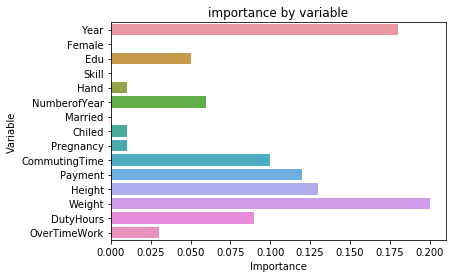

In [24]:
import seaborn as sns
ax = sns.barplot(x=df_data['Imt'], y=df_data['Colume'])
ax.set(xlabel='Importance', ylabel='Variable')
plt.title('importance by variable')
plt.show()

In [25]:
del df['Female']

In [26]:
data = np.array(df)
nvar = data.shape[1]
datax = data[:,1:nvar]
datay = data[:,0]

In [27]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(datax, datay, test_size=0.3, random_state=500)

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_x)
train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

In [29]:
from sklearn.naive_bayes import GaussianNB
bayes = GaussianNB(priors=[0.59, 0.41])
bayes.fit(train_x,train_y)
predict = bayes.predict(test_x)

In [30]:
dif = test_y - predict
accuracy3 = 1 - (np.size(np.where(dif != 0))/np.size(test_y))
print(accuracy3)

0.40603112840466926


## 두가지 방법으로 분석한 결과를 모두 활용한 경우

In [31]:
df.columns

Index(['Bad', 'Year', 'Edu', 'Skill', 'Hand', 'NumberofYear', 'Married',
       'Chiled', 'Pregnancy', 'CommutingTime', 'Payment', 'Height', 'Weight',
       'DutyHours', 'OverTimeWork'],
      dtype='object')

In [32]:
import statsmodels.api as sm
x = df[['Year', 'Edu', 'Skill', 'Hand', 'NumberofYear', 'Married',
       'Chiled', 'Pregnancy', 'CommutingTime', 'Payment', 'Height', 'Weight',
       'DutyHours', 'OverTimeWork']]
x2 = sm.add_constant(x)
model = sm.OLS(datay,x2)
result = model.fit()
result.summary()

C:\Users\KimJinSeop\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     19.27
Date:                Thu, 07 Nov 2019   Prob (F-statistic):           3.62e-49
Time:                        00:32:39   Log-Likelihood:                 9898.6
No. Observations:               34266   AIC:                        -1.977e+04
Df Residuals:                   34251   BIC:                        -1.964e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0117      0.028     -0.414      0.679      -0.067       0.044
Year              0.0010      0.000      3.918      0.000       0.001       0.002
Edu               0.0013      0.002      0.531      0.596      -0.004       0.006
Skill             0.0154      0.005      3.292      0.001       0.006       0.025
Hand             -0.0036      0.007     -0.488      0.626      -0.018       0.011
NumberofYear     -0.0068      0.002     -3.194      0.001      -0.011      -0.003
Married          -0.0229      0.006     -4.074      0.000      -0.034      -0.012
Chiled            0.0252      0.004      6.326      0.000       0.017       0.033
Pregnancy         0.0218      0.006      3.864      0.000       0.011       0.033
CommutingTime     0.0652      0.005     11.936      0.000       0.055       0.076
Payment       -3.673e-09   2.95e-09     -1.246      0.213   -9.45e-09     2.1e-09
Height           -0.0002      0.000     -1.706      0.088      -0.001    3.68e-05
Weight            0.0013      0.000      5.815      0.000       0.001       0.002
DutyHours      1.969e-05   2.74e-05      0.719      0.472    -3.4e-05    7.34e-05
OverTimeWork     -0.0082      0.002     -3.421      0.001      -0.013      -0.003
==============================================================================
Omnibus:                    33213.575   Durbin-Watson:                   1.334
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           960442.423
Skew:                           5.063   Prob(JB):                         0.00
Kurtosis:                      26.878   Cond. No.                     1.23e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.23e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
index = 0
columes = ""
for pval in result.pvalues:
    if(index == 0):
        index = index + 1
        continue
    if(pval < 0.05):
        columes = columes + "'"+ x.columns[index-1] + "',"
    index = index + 1
print(columes)

'Year','Skill','NumberofYear','Married','Chiled','Pregnancy','CommutingTime','Weight','OverTimeWork',


In [34]:
df = df[['Bad','Year','Skill','NumberofYear','Married','Chiled','Pregnancy','CommutingTime','Weight','OverTimeWork']]
df.head()

,Bad,Year,Skill,NumberofYear,Married,Chiled,Pregnancy,CommutingTime,Weight,OverTimeWork
0,1,33.0,2.0,5.0,1.0,1.0,0.0,0.0,45.0,0.0
1,0,36.0,2.0,5.0,1.0,1.0,0.0,0.0,56.0,0.0
2,0,35.0,2.0,5.0,1.0,1.0,0.0,0.0,46.0,0.0
3,0,33.0,2.0,5.0,1.0,1.0,0.0,0.0,45.0,0.0
4,0,36.0,2.0,5.0,1.0,1.0,0.0,0.0,45.0,0.0


In [35]:
data = np.array(df)
nvar = data.shape[1]
datax = data[:,1:nvar]
datay = data[:,0]

In [36]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(datax, datay, test_size=0.3, random_state=500)

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_x)
train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

In [38]:
from sklearn.naive_bayes import GaussianNB
bayes = GaussianNB(priors=[0.59, 0.41])
bayes.fit(train_x,train_y)
predict = bayes.predict(test_x)

In [39]:
# prior가 동일한 경우
dif = test_y - predict
accuracy4 = 1 - (np.size(np.where(dif != 0))/np.size(test_y))
print(accuracy4)

0.8082684824902724


## 성능 결과 그래프

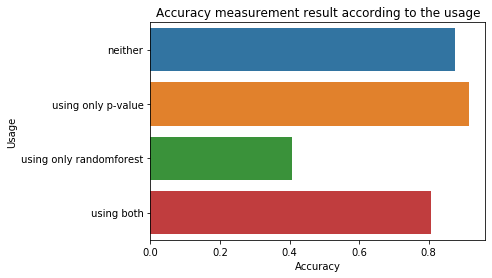

In [40]:
import seaborn as sns
list_ac = [accuracy1,accuracy2,accuracy3,accuracy4]
list_us = ['neither','using only p-value','using only randomforest','using both']
df_data = {'acc' : list_ac, 'use' : list_us}
df_data = pd.DataFrame(df_data)
ax = sns.barplot(x=df_data['acc'], y=df_data['use'])
ax.set(xlabel='Accuracy', ylabel='Usage')
plt.title('Accuracy measurement result according to the usage')
plt.show()